# Basic Statistical Analysis

We will continue talking about Jupyter and will take a quick look on basic statistical analysis with Python.

## The data

General topic of "doing data science with python" is just too broad for us to cover, so instead let us talk about doing basic statistic on real datasets. A really popular way to do this in python is with the help of a great (both in terms of quality and API size) library called `pandas`. Covering even this library alone in an hour is an impossible task, so instead we will only briefly look how one can analyse a real-world dataset with help of `pandas`. If you want more, you can find a full page of tutorials on [this page](https://pandas.pydata.org/pandas-docs/stable/getting_started/tutorials.html).

As an example of a real-world dataset let's use the an exported group chat from Telegram. In case you don't know, Telegram is a chat app, similar (but much better, of course) to What's App. For the curious, the screenshot is below

<img src="telegram.png"/>

There are group chats as well, both public and invite-only. The group we are going to use as an example is the English-speaking user group of `emacs` text editor. The dataset itself consists of the messages for the whole November 2020 in `json` format.

**DISCLAIMER**: Those are publically visible messages from an open group chat. There are no personal details of the chat memebers, except, maybe, for a name, if they decided to disclose it. As far as we know, it is perfectly legally find to use this data for our purposes.

The messages itself are stored on disk in a `json` file. There is a builtin python module for working with `json`-files, here's how you can read a file from disk.

In [1]:
import json

with open("result.json") as fd:
    chat = json.load(fd)
    
chat

{'name': 'Emacs (english)',
 'type': 'public_supergroup',
 'id': 10006179166,
 'messages': [{'id': 34604,
   'type': 'service',
   'date': '2020-11-01T11:47:51',
   'actor': 'Karina 🦊 Drummer',
   'actor_id': 5517270395,
   'action': 'invite_members',
   'members': ['Karina 🦊 Drummer'],
   'text': ''},
  {'id': 34605,
   'type': 'message',
   'date': '2020-11-02T05:12:41',
   'from': 'Sunny',
   'from_id': 4829321630,
   'text': 'man ox-hugo is great'},
  {'id': 34606,
   'type': 'message',
   'date': '2020-11-02T12:21:35',
   'edited': '2020-11-02T12:21:39',
   'from': 'akater',
   'from_id': 4298756957,
   'text': ["For a given core Elisp function, how do I figure out whether tests for it exist?  (I don't know ",
    {'type': 'code', 'text': 'ert'},
    ', or any other test framework really.)']},
  {'id': 34607,
   'type': 'message',
   'date': '2020-11-02T17:42:17',
   'from': '(λv.vandr0iy)',
   'from_id': 4315895497,
   'text': ['anyone knows how does one set up a per-folder env v

The important this for us at the moment is that the chat export is a simple dictionary. Messages itself are stored in a list under key `"messages"`. Every message has a type. If we simply collect all the message types, we get the following two options

In [2]:
message_types = set(
    message["type"]
    for message in chat["messages"])
message_types

{'message', 'service'}

`message` indicates that the message is a, well, regular `message`. `service` corresponds to separate actions, like users entering and leaving chat. Let's take only the messages

In [3]:
messages = [
    message
    for message in chat["messages"]
    if message["type"] == "message"
]

len(messages)

3201

So far so good, we don't need anything but python's sets and list expressions. Why do we need something other than that? Well, let's imagine, that we want to build, for example, a timeline of how many messages was sent to the group every day. What would we have to do in pure python?

In [4]:
import dateutil

# Collect the timestamps
timestamps = [message["date"] for message in messages]

# Transform them into proper timestamp objects
timestamps = [dateutil.parser.parse(t) for t in timestamps]

# Round down to day sart
rounded_timestamps = [t.date() for t in timestamps]

# Group by the rounded timestamps
import itertools

grouped_timestamps = itertools.groupby(rounded_timestamps)

timestamps = []
messages_per_hour = []
for timestamp, group in grouped_timestamps:
    timestamps.append(timestamp)
    messages_per_hour.append(len(list(group)))

11 lines of code if we know the standard library well enough. Sure, this could be much much worse if we picked a different language. But it can be made both more terse and readable if we use `pandas`.

## Pandas

Pandas is a library for manipulating datasets. To transform our list of messages into a dataset we need to wrap it into `DataFrame` constructor. What we get is a special object that can be thought of as a table with your data inside.

By the way, notice that Jupyter recognizes `DataFrame`s and prints them as human-readable tables.

In [5]:
import pandas

df = pandas.DataFrame(messages)
df

,id,type,date,from,from_id,text,edited,reply_to_message_id,file,thumbnail,media_type,sticker_emoji,width,height,photo,forwarded_from,mime_type,duration_seconds
0,34605,message,2020-11-02T05:12:41,Sunny,4829321630,man ox-hugo is great,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34606,message,2020-11-02T12:21:35,akater,4298756957,"[For a given core Elisp function, how do I fig...",2020-11-02T12:21:39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,34607,message,2020-11-02T17:42:17,(λv.vandr0iy),4315895497,[anyone knows how does one set up a per-folder...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,34608,message,2020-11-02T17:47:23,мімний кицяк,4498133377,"Well you can eval elisp code in dir-locals, bu...",NaN,34607.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,34609,message,2020-11-02T17:57:24,Кабачок,4673302507,Put dir locals file in desired folder,NaN,34607.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3196,37912,message,2020-11-29T19:06:38,Dmytro Lispyvnyi '(🌲 🍺),4429618342,Been coding in clojure for years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3197,37913,message,2020-11-29T19:06:49,Arjaz,4584400887,We don't have any clojure jobs here in my country,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3198,37914,message,2020-11-29T19:07:28,Arjaz,4584400887,"(Well, I guess we have looking at your name, lol)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3199,37915,message,2020-11-29T19:07:36,Dmytro Lispyvnyi '(🌲 🍺),4429618342,"You don't have to work in your country, especi...",NaN,37913.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


If you want to get a quick overview of your dataset, you can consult `.info()` method.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3201 entries, 0 to 3200
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   3201 non-null   int64  
 1   type                 3201 non-null   object 
 2   date                 3201 non-null   object 
 3   from                 3201 non-null   object 
 4   from_id              3201 non-null   int64  
 5   text                 3201 non-null   object 
 6   edited               227 non-null    object 
 7   reply_to_message_id  1663 non-null   float64
 8   file                 39 non-null     object 
 9   thumbnail            38 non-null     object 
 10  media_type           31 non-null     object 
 11  sticker_emoji        25 non-null     object 
 12  width                66 non-null     float64
 13  height               66 non-null     float64
 14  photo                27 non-null     object 
 15  forwarded_from       7 non-null      o

Each `DataFrame` has an index -- it can be thought as an address of a row. By default, `pandas` will simply enumerate the rows in a `DataFrame`, however, you can pick any column or their combination as a new index. But this is a large topic, so please refer to a proper tutorial.

In [7]:
df.index

RangeIndex(start=0, stop=3201, step=1)

To locate the data inside the `DataFrame` we can use several methods, but to make things a bit more simpler, let's talk only about `.loc`. `.loc` can be indexed with square brackets in several ways. To simply take a specific row you can use

In [8]:
df.loc[100]

id                                                                 34708
type                                                             message
date                                                 2020-11-07T15:52:10
from                                                         Zachary Teo
from_id                                                       4370898284
text                   Cause I recompile an .elc file there. And it d...
edited                                                               NaN
reply_to_message_id                                                  NaN
file                                                                 NaN
thumbnail                                                            NaN
media_type                                                           NaN
sticker_emoji                                                        NaN
width                                                                NaN
height                                             

To select a specific cell, use both row index and a column name

In [9]:
df.loc[100, "text"]

"Cause I recompile an .elc file there. And it doesn't seem to be using the new version"

To slice along the column you can use `:` as the row index

In [10]:
df.loc[:, "text"]

0                                    man ox-hugo is great
1       [For a given core Elisp function, how do I fig...
2       [anyone knows how does one set up a per-folder...
3       Well you can eval elisp code in dir-locals, bu...
4                   Put dir locals file in desired folder
                              ...                        
3196                     Been coding in clojure for years
3197    We don't have any clojure jobs here in my country
3198    (Well, I guess we have looking at your name, lol)
3199    You don't have to work in your country, especi...
3200                                    Yeah, that's true
Name: text, Length: 3201, dtype: object

The shortcut for that is simply to use the square bracket indexing on the `DataFrame` itself

In [11]:
df["text"]

0                                    man ox-hugo is great
1       [For a given core Elisp function, how do I fig...
2       [anyone knows how does one set up a per-folder...
3       Well you can eval elisp code in dir-locals, bu...
4                   Put dir locals file in desired folder
                              ...                        
3196                     Been coding in clojure for years
3197    We don't have any clojure jobs here in my country
3198    (Well, I guess we have looking at your name, lol)
3199    You don't have to work in your country, especi...
3200                                    Yeah, that's true
Name: text, Length: 3201, dtype: object

This actually returns a different special pandas object called `Series`. They are a bit similar to `DataFrames`, in a sense that they map indices to data, but the data is always a single value instead of a row. The have exremely similar APIs (though there are some inconsistencies).

You can actually use `Series` in an indexing expression -- in this case the series index is used to filter the data frame. Here's for example how you can select all the messages that have `"edited"` column as non-empty:

- select `"edited"` column
- drop all the NaN
- use resulting series as an index

Which can be written in a single line as

In [12]:
df[df["edited"].notna()]  # df.loc[...] will do the same

,id,type,date,from,from_id,text,edited,reply_to_message_id,file,thumbnail,media_type,sticker_emoji,width,height,photo,forwarded_from,mime_type,duration_seconds
1,34606,message,2020-11-02T12:21:35,akater,4298756957,"[For a given core Elisp function, how do I fig...",2020-11-02T12:21:39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34,34640,message,2020-11-04T02:05:10,vlad gen2 💠,4514213202,"[Well, read the , {'type': 'code', 'text': '#r...",2020-11-04T02:05:19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,34641,message,2020-11-04T02:05:44,Howard Abrams,5149162958,"[{'type': 'bot_command', 'text': '/me'}, slap...",2020-11-04T02:06:27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,34645,message,2020-11-04T06:42:16,André Gomes,4815925265,I've been wondering about this too!,2020-11-04T06:42:27,34636.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,34666,message,2020-11-05T12:37:51,Zachary Teo,4370898284,no worries :) thanks for your help tho!,2020-11-05T12:38:04,34665.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,37859,message,2020-11-29T15:04:22,Dmytro Lispyvnyi '(🌲 🍺),4429618342,I think it's worth mentioning use-package,2020-11-29T15:04:27,37842.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3152,37867,message,2020-11-29T15:43:44,Arjaz,4584400887,"[Hello, does anyone know how I can get that ty...",2020-11-29T15:44:10,NaN,NaN,NaN,NaN,NaN,624.0,250.0,(File not included. Change data exporting sett...,NaN,NaN,NaN
3158,37873,message,2020-11-29T16:54:40,Mark V.,4576538212,"wdym first, you're new to programming overall?",2020-11-29T16:54:45,37663.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3159,37874,message,2020-11-29T17:12:33,Dmytro Lispyvnyi '(🌲 🍺),4429618342,"From these two - clojure, but I agree with Bre...",2020-11-29T17:13:59,37663.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Ok, how now let's fix the problem with the datetimes. First, there is a shortcut function in `pandas` that simply converts a broad family of input types into the internal date representation. We can pass entire series of string timestamps and get a series of dates. We can insert the resulting series back into the original `DataFrame` replacing all the data iside the column.

In [13]:
df["date"] = pandas.to_datetime(df["date"])
df["date"][0]

Timestamp('2020-11-02 05:12:41')

Let's try something simple first. Let's create collect the top 10 posters in the data set. We take the `DataFame` and then group it by user name. Then to each group we apply a function that takes the group size. What we get is a series that maps the user name to the number of messages they've sent into the list. We sort this in desceding order and then take the first 10 position.

In `pandas` it's a one-line expression. We convert the result into a single-column data frame only so Jupyter can print it as a pretty table.

In [14]:
top10_posters = df.groupby("from").size().sort_values(ascending=False).head(10)
top10_posters.to_frame()

,0
from,
Dmytro Lispyvnyi '(🌲 🍺),378
Conrad,293
JollyJenkins,176
D_Shadow (CxCxC),176
Mike,166
Mikhail Borisov,153
(merazi (gnu-boi) (emacs noob)),143
Eric Londres,142
Spark,140


Now the timeline. We take the date column.

In [15]:
df["date"].to_frame()

,date
0,2020-11-02 05:12:41
1,2020-11-02 12:21:35
2,2020-11-02 17:42:17
3,2020-11-02 17:47:23
4,2020-11-02 17:57:24
...,...
3196,2020-11-29 19:06:38
3197,2020-11-29 19:06:49
3198,2020-11-29 19:07:28
3199,2020-11-29 19:07:36


We round it down to the beginning of the day.

In [16]:
day = df["date"].dt.floor("D")
day.to_frame()

,date
0,2020-11-02
1,2020-11-02
2,2020-11-02
3,2020-11-02
4,2020-11-02
...,...
3196,2020-11-29
3197,2020-11-29
3198,2020-11-29
3199,2020-11-29


We group the resulting series by day -- this is achieved by explicitly passing the column data as the grouping expression -- and then we take the group size. It takes just two lines of code and those lines are extramely declarative: you simply say what you want to do with your data instead of writing the detailed way of doing that.

In [17]:
daily_rate = day.groupby(day).size()
daily_rate.to_frame()

,date
date,
2020-11-02,5
2020-11-03,20
2020-11-04,22
2020-11-05,43
2020-11-06,9
2020-11-07,7
2020-11-09,34
2020-11-10,74
2020-11-11,20


Here is how you can plot this series. There are other way to draw a plot -- `pandas` ships with plotting tools, there is also `seaborn` if you want advanced statistical plots -- but we will going to use bare `matplotlib`.

DatetimeIndex(['2020-11-02', '2020-11-03', '2020-11-04', '2020-11-05',
               '2020-11-06', '2020-11-07', '2020-11-09', '2020-11-10',
               '2020-11-11', '2020-11-12', '2020-11-13', '2020-11-14',
               '2020-11-15', '2020-11-16', '2020-11-17', '2020-11-18',
               '2020-11-19', '2020-11-20', '2020-11-21', '2020-11-22',
               '2020-11-23', '2020-11-24', '2020-11-25', '2020-11-26',
               '2020-11-27', '2020-11-28', '2020-11-29'],
              dtype='datetime64[ns]', name='date', freq=None)


<IPython.core.display.Javascript object>


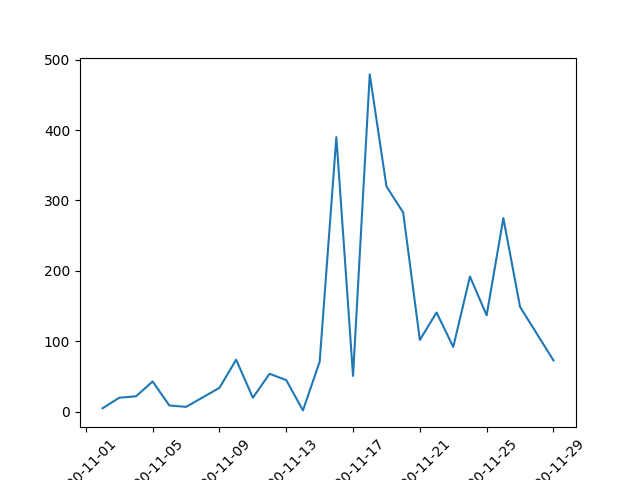

(array([18567., 18571., 18575., 18579., 18583., 18587., 18591., 18595.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

In [18]:
import matplotlib.pyplot as plot

%matplotlib notebook

print(daily_rate.index)

plot.figure()
plot.plot(daily_rate.index, daily_rate.values)
plot.xticks(rotation=45)

What if we wanted to see the what are the peak hours throughout the month? We can start the same way -- take the date and round it down to the start of the hour and then group it into hour-long bins.

In [19]:
hour = df["date"].dt.floor("H")
hourly_rate = hour.groupby(hour).size()
hourly_rate.to_frame()

,date
date,
2020-11-02 05:00:00,1
2020-11-02 12:00:00,1
2020-11-02 17:00:00,3
2020-11-03 05:00:00,3
2020-11-03 06:00:00,1
...,...
2020-11-29 15:00:00,8
2020-11-29 16:00:00,6
2020-11-29 17:00:00,11


And then we group it, but this time using a function that simply returns the hour of the current timestamp. And then for each group we take a mean over the group -- this should give use hourly activity averaged over the days.

In [20]:
def get_hour(ts):
    return ts.hour

hourly_rate = hourly_rate.groupby(get_hour).mean()
hourly_rate.to_frame()

,date
0,9.375000
1,8.250000
2,5.777778
3,3.083333
4,3.888889
5,5.545455
6,4.666667
7,9.181818
8,33.444444
9,6.400000


<IPython.core.display.Javascript object>


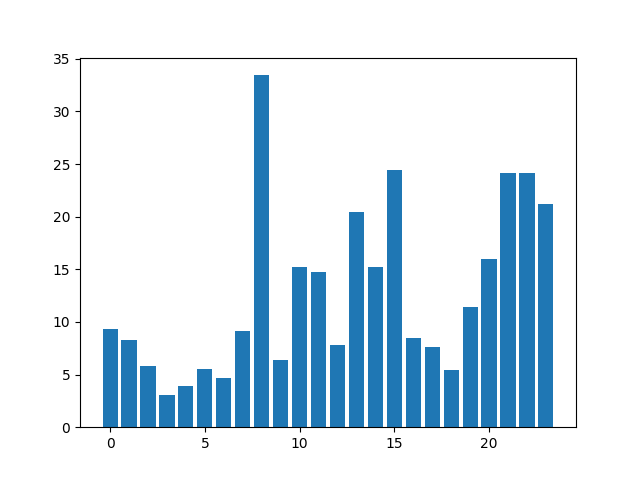

<BarContainer object of 24 artists>

In [21]:
plot.figure()
plot.bar(
    hourly_rate.index,
    hourly_rate.values)

And for something completely different, let's take a look what emojis are the most popular throughout the messages. What we do is we write a function that take the message text and returns the emojis found in the message or a NaN if there is none. NaN is here so we can easily drop the empty values by using `.dropna()` method. What we get is a series of python lists with emojis inside.

In [22]:
import emoji
import numpy


def extract_emojis(text):
    if not isinstance(text, str):
        # Sometimes a message is a text + a link/photo,
        # in this case message["text"] would be
        # an object. Let's just skip this for now.
        return numpy.nan
        
    emojis = [char for char in text if char in emoji.UNICODE_EMOJI]
    return emojis or numpy.nan
    #  ^^^ this guarantees that the result is either a non-empty list
    #      or numpy's NaN we can throw away in a single .dropna()

    
text_emojis = df["text"].map(extract_emojis).dropna()
text_emojis

7          [🤦, 🏻, ♂]
80               [😃]
148              [😉]
179              [😅]
218              [😄]
            ...     
3142             [♥]
3156             [😝]
3160             [🧡]
3170             [😅]
3186    [😂, 😂, 😂, 😂]
Name: text, Length: 86, dtype: object

We combine them into a single list using `sum()` method. Generally speaking it just reduces a series using `+` operator, so it turns `Series([a, b, c, d, ...])` into `a + b + c + d + ...`. But for lists `+` is a concatenation, so what we get is a huge concatenation of all the cells. We wrap this back into a series and then do the usual group-agregate-sort step.

In [23]:
text_emojis = pandas.Series(text_emojis.sum())

top5_emojis = text_emojis.groupby(text_emojis).size().sort_values(ascending=False).head(5)
top5_emojis.to_frame()

,0
😂,27
😅,14
🤔,13
👌,5
🏻,5
